In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
data_frame = pd.read_excel("Dataset for ITM.xlsx")
data_frame['Start Date'] = pd.to_datetime(data_frame['Start Date'], errors='coerce')
data_frame['End Date'] = pd.to_datetime(data_frame['End Date'], errors='coerce')


Source: https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

In [78]:
company_df = data_frame[["Name Of Awarded Company","Amount Awarded"]].groupby("Name Of Awarded Company")
grouped_company = company_df.sum().sort_values(by = "Amount Awarded", ascending = False)
grouped_company.reset_index(level = 0, inplace = True)
grouped_company.to_csv("Grouped Awarded Companies.csv",index = False)


source for replacing date: https://www.kite.com/python/examples/3011/datetime-replace-attributes-of-a-datetime

In [4]:
def start_date_replacer(df):
    remove_start_date = [2021,1920,2030,2010]
    if df['Start Date'].year in remove_start_date:
        return df['Start Date'].replace(year = 2020)
    else:
        return df['Start Date']
data_frame['Edited Start Date'] = data_frame.apply(start_date_replacer,axis = 1)

def end_date_replacer(df):
    remove_end_date = [2019,2018]
    if df['End Date'].year in remove_end_date:
        return df['End Date'].replace(year = 2020)
    else:
        return df['End Date']
data_frame['Edited End Date'] = data_frame.apply(end_date_replacer,axis = 1)

In [80]:
data_frame

,Project Name,Approved Budget,Start Date,End Date,Name Of Awarded Company,Amount Awarded,Date Of Award,Notice Of Award,Acceptance Date,Contract/PO,Annual Procurement Plan,Procuring Entity,Edited Start Date,Edited End Date
0,Human Grade Disinfectant Solution and Face Mas...,108864.00,2020-04-08,2020-04-18,Bauertek Corporation,108864.00,2020-04-02,../data/files/ac/158740199613499105865e9dd50c5...,2020-04-08,../data/files/ac/15874019964847354715e9dd50c8b...,../data/files/ac/158740199613438144985e9dd50ca...,2,2020-04-08,2020-04-18
1,Procurement of relief goods,686000.00,2020-04-16,2020-04-23,Tina's Dried Fish and Egg Dealer,632800.00,2020-04-16,../data/files/ac/158743737319713191255e9e5f3d1...,2020-04-16,../data/files/ac/158743737313500582815e9e5f3d3...,../data/files/ac/158743737313663542645e9e5f3d5...,12,2020-04-16,2020-04-23
2,Procurement of relief goods,686000.00,2020-04-16,2020-04-23,Tina's Dried Fish and Eggs,632800.00,2020-04-15,../data/files/ac/158743802112216884515e9e61c5c...,2020-04-15,../data/files/ac/158743802217270902035e9e61c61...,../data/files/ac/15874380221482207815e9e61c64c...,12,2020-04-16,2020-04-23
3,Procurement of Relief Goods,1577000.00,2020-04-17,2020-04-24,Green Season Rice Mill & Grain Center,1535500.00,2020-04-15,../data/files/ac/158743802219192906415e9e61c66...,2020-04-15,../data/files/ac/15874380227107210245e9e61c682...,../data/files/ac/1587438022420511405e9e61c6c6d...,12,2020-04-17,2020-04-24
4,Procurement of Various Medical Supplies for It...,64900000.00,2020-03-24,2020-05-22,"Rebmann, Inc.",64790000.00,2020-03-16,../data/files/ac/15875189662265925425e9f9df656...,2020-03-18,../data/files/ac/158751896621029973485e9f9df69...,../data/files/ac/15875189668094963615e9f9df6c5...,42,2020-03-24,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12085,Negotiated Procurement (Emergency Cases Under ...,122000.00,2020-06-01,2020-06-11,JOSMEF ENT.,122000.00,2020-05-28,../data/files/ac/15971286266023004715f323fb2c8...,2020-06-16,../data/files/ac/15971286277089178105f323fb361...,../data/files/ac/159712862714603273325f323fb39...,205,2020-06-01,2020-06-11
12086,ACQUISITION OF FOOD AND NON FOOD SUPPLIES FOR ...,6819800.00,2020-06-15,2020-06-22,KSL ENTERPRISES,6624040.00,2020-06-10,../data/files/ac/159712866775429235f323fdbf2b5...,2020-06-15,../data/files/ac/15971286684643314485f323fdc1f...,../data/files/ac/159712866810007323515f323fdc4...,1167,2020-06-15,2020-06-22
12087,Negotiated Procurement (Emergency Cases Under ...,121500.00,2020-06-03,2020-06-16,Josmef Ent.,121500.00,2020-06-01,../data/files/ac/159712877215903505735f3240443...,2020-06-11,../data/files/ac/159712877215715196475f3240445...,../data/files/ac/159712877214667133985f3240449...,205,2020-06-03,2020-06-16
12088,LOGISTICAL SUPPORT FOR EMERGENCY PREPAREDNESS ...,621600.00,2020-06-16,2020-06-30,RTY CATERING SERVICES,603840.00,2020-06-10,../data/files/ac/15971290583606393095f32416200...,2020-06-15,../data/files/ac/159712905820931271575f3241623...,../data/files/ac/159712905814110649515f3241627...,1167,2020-06-16,2020-06-30


In [81]:
consolidated = data_frame.loc[:,["Name Of Awarded Company","Edited Start Date","Edited End Date"]]
# We assume that some dates are interchanged between the start and end thus the abs value
consolidated["Date Difference"] =  abs(consolidated["Edited End Date"] - consolidated["Edited Start Date"])


In [82]:
consolidated

,Name Of Awarded Company,Edited Start Date,Edited End Date,Date Difference
0,Bauertek Corporation,2020-04-08,2020-04-18,10 days
1,Tina's Dried Fish and Egg Dealer,2020-04-16,2020-04-23,7 days
2,Tina's Dried Fish and Eggs,2020-04-16,2020-04-23,7 days
3,Green Season Rice Mill & Grain Center,2020-04-17,2020-04-24,7 days
4,"Rebmann, Inc.",2020-03-24,2020-05-22,59 days
...,...,...,...,...
12085,JOSMEF ENT.,2020-06-01,2020-06-11,10 days
12086,KSL ENTERPRISES,2020-06-15,2020-06-22,7 days
12087,Josmef Ent.,2020-06-03,2020-06-16,13 days
12088,RTY CATERING SERVICES,2020-06-16,2020-06-30,14 days


In [83]:
consolidated["Date Difference"] = consolidated["Date Difference"].dt.days

In [85]:
sorted_date = consolidated.sort_values(by = "Date Difference", ascending = True).copy()

In [88]:
sorted_date.tail(50)

,Name Of Awarded Company,Edited Start Date,Edited End Date,Date Difference
10062,Reliance Producers Cooperative,2020-05-04,2021-05-04,365
8679,"Omnibus Bio Medical Systems, Inc.",2020-06-19,2021-06-19,365
3870,"Rebmann, Incorporated",2020-03-14,2021-03-14,365
5555,"EC Zuric Biotherapies, Inc.",2020-03-30,2021-03-30,365
5556,East Lane Corporation,2020-03-30,2021-03-30,365
5557,Rebmann Incorporated,2020-03-30,2021-03-30,365
3847,"Wyler Enterprises, Inc.",2020-04-29,2021-04-29,365
5558,"Janissa Healthcare Philippines, Inc.",2020-04-06,2021-04-06,365
10085,Medical Center Trading Corporation,2020-04-17,2021-04-17,365
8588,KAMIKO CARGO MOVERS CORPORATION,2020-07-16,2021-07-16,365


In [89]:
average_date_diff = sorted_date[["Name Of Awarded Company","Date Difference"]].groupby("Name Of Awarded Company").mean()
average_date_diff = average_date_diff.rename(columns = {"Date Difference":"Average Date Difference" })
average_date_diff.reset_index(level = 0, inplace = True)
average_date_diff = average_date_diff.sort_values(by = "Average Date Difference", ascending = True)



In [90]:
average_date_diff

,Name Of Awarded Company,Average Date Difference
2440,HEXA CM INDUSTRIAL & TRADING CORP.,0.00
5333,SEASIDE SHELL STATION,0.00
532,Axn Enterprises,0.00
4389,Olten Instruments,0.00
1656,EF WILLIAMS DRY GOODS AND SUPPLIES TRADING,0.00
...,...,...
5140,Rainphil Inc.,366.00
3668,MCS Paper Supply & General Merchandise,367.00
589,BDSCIENTIA MEDICAL AND DIAGNOSTIC SUPPLIES INC,371.00
4857,R.F. FLORES Construction,395.00


Source: https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

In [91]:
grouped_company

,Name Of Awarded Company,Amount Awarded
0,Pharmally Pharmaceutical Corporation,7851146016.00
1,XUZHOU CONSTRUCTION MACHINERY GROUP IMP. AND E...,1898000000.00
2,Ferjan Healthlink Philippines Inc.,727500000.00
3,BV Three Two Four Printing and Trading,627619068.00
4,Biosite Medical Instruments,592160200.00
...,...,...
6350,CHARLE'S BURGER,108.00
6351,CILVAN'S DRESSED CHICKEN AND CHICKEN PRODUCTS,100.00
6352,Mercury Drug,70.00
6353,Junnel's Dry Goods Store,50.00


In [95]:
merged_df = pd.merge(grouped_company,average_date_diff, on = "Name Of Awarded Company")

In [97]:
merged_df = merged_df.sort_values(by = "Amount Awarded",ascending = True)
merged_df['Amount Awarded'] = merged_df['Amount Awarded']/100000
merged_df = merged_df.rename(columns = {"Amount Awarded": "Amount Awarded (in hundred thousands)"})
merged_df.to_csv("Amount and Date Difference Relationship.csv",index = False)

To get spenditure of Procuring Entities

In [98]:
spenditure_df = data_frame.loc[:,["Procuring Entity","Edited Start Date","Amount Awarded"]]
spenditure_df.to_csv("Procuring Entity Spenditure.csv",index = False)







To get awarded companies to compare with Philgeps

In [99]:
company_df = data_frame.loc[:,["Name Of Awarded Company","Amount Awarded"]]
company_df.to_csv("Companies and Amount Awarded.csv",index = False)

In [100]:
philgeps_df = pd.read_excel("LIST OF PLATINUM IN INTRANET (Data generated as of 18-05-2020 01'09PM).xlsx")
company_prof_list = philgeps_df[['Orgname Name','Registration Date','Issuance Date']]
working_company_prof = company_prof_list.copy()

In [101]:
working_company_prof["Company Age"] = working_company_prof.loc[:,"Issuance Date"] - working_company_prof.loc[:,"Registration Date"]
working_company_prof["Company Age"] = working_company_prof["Company Age"].dt.days/365
working_company_prof = working_company_prof.rename(columns = {"Orgname Name": "Company"})



In [103]:
working_company_prof

,Company,Registration Date,Issuance Date,Company Age
0,PACIFIC SUMMIT CONSTRUCTION GROUP INC.,2008-03-25 09:04:48.020,2019-05-17 08:40:56,11.15
1,"ADVANCE COMPUTER FORMS, INC.",2001-06-29 10:12:18.000,2019-05-15 03:05:25,17.88
2,YOLACH'S VENUE,2015-06-11 10:03:05.653,2019-04-16 12:24:38,3.85
3,HYPERNET-INTERNET & BUSINESS SOLUTIONS INC.,2012-10-16 11:05:40.763,2019-05-16 10:05:14,6.58
4,JOINT-PROCESS PLANNING AND BUSINESS SYSTEMS,2015-11-19 11:17:42.530,2019-05-20 01:01:59,3.50
...,...,...,...,...
19202,RILEY CORPORATION,2012-12-18 10:57:33.280,2020-02-04 04:03:46,7.13
19203,"COUNTERPOINT SECURITY SYSTEM, INC.",2012-03-30 16:19:22.780,2020-02-04 08:46:25,7.85
19204,JR. JIRO ERICA ACUÑA AGRIVENTURES COMPANY,2016-12-16 09:46:24.310,2020-01-31 10:19:59,3.13
19205,NORA ESPINAS GARMENTS,2005-01-31 11:03:55.000,2020-01-27 12:37:32,15.00


In [104]:
company_df['Name Of Awarded Company'] = company_df['Name Of Awarded Company'].str.upper()

In [105]:
collated_companies_df = pd.merge(left = company_df, right = working_company_prof, left_on = "Name Of Awarded Company", right_on = "Company")

collated_companies_df

,Name Of Awarded Company,Amount Awarded,Company,Registration Date,Issuance Date,Company Age
0,AVECILLA TRADING,1749000.00,AVECILLA TRADING,2016-05-16 16:46:11.757,2019-10-01 03:23:56,3.38
1,AVECILLA TRADING,524700.00,AVECILLA TRADING,2016-05-16 16:46:11.757,2019-10-01 03:23:56,3.38
2,AVECILLA TRADING,90000.00,AVECILLA TRADING,2016-05-16 16:46:11.757,2019-10-01 03:23:56,3.38
3,EASYLIFE MEDICAL ENTERPRISE,2999870.00,EASYLIFE MEDICAL ENTERPRISE,2017-11-09 18:48:24.083,2019-06-19 10:28:33,1.61
4,EASYLIFE MEDICAL ENTERPRISE,2874280.32,EASYLIFE MEDICAL ENTERPRISE,2017-11-09 18:48:24.083,2019-06-19 10:28:33,1.61
...,...,...,...,...,...,...
2812,WESTFRONT HOTEL SERVICES CORPORATION,4320000.00,WESTFRONT HOTEL SERVICES CORPORATION,2014-10-03 07:23:34.860,2019-10-18 11:50:10,5.04
2813,BAYUGAN SEEDS CENTER,3038000.00,BAYUGAN SEEDS CENTER,2014-06-24 08:45:13.903,2019-09-11 09:40:15,5.22
2814,ONE THAT LOVE TRADING,1316000.00,ONE THAT LOVE TRADING,2016-09-30 14:40:46.630,2019-07-09 03:34:00,2.77
2815,ONE THAT LOVE TRADING,1316000.00,ONE THAT LOVE TRADING,2016-09-30 14:40:46.630,2019-07-09 03:34:00,2.77


In [106]:
collated_companies_df = collated_companies_df[['Name Of Awarded Company','Amount Awarded','Company Age']].copy()
collated_companies_df['Amount Awarded'] = collated_companies_df["Amount Awarded"]/100000
collated_companies_df = collated_companies_df.rename(columns = {'Amount Awarded':'Amount Awarded (in hundred thousands)'}).copy()
collated_companies_df.to_csv("Relationship of Amount Awarded and Company Age.csv",index = False)



Get number of unique companies registered in philgeps list relative to unique awarded companies

In [125]:
unique_number_awarded_comp = grouped_company['Amount Awarded'].count()
number_of_companies_philgeps = working_company_prof['Company'].count()

In [126]:
print(number_of_companies_philgeps)
print(unique_number_awarded_comp)

19207
6355


https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm#:~:text=Matplotlib%20API%20has%20a%20pie,1%20%2D%20sum(x).

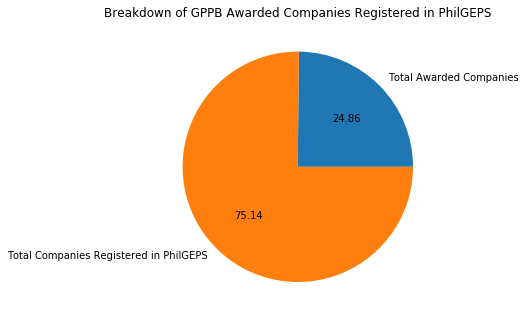

In [131]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.title.set_text('Breakdown of GPPB Awarded Companies Registered in PhilGEPS')
companies = ['Total Awarded Companies', 'Total Companies Registered in PhilGEPS']
number = [unique_number_awarded_comp,number_of_companies_philgeps]
ax.pie(x = number, labels = companies,autopct='%.2f')
plt.show()